# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url =  'http://api.openweathermap.org/data/2.5/weather?'
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lasa
Processing Record 2 of Set 1 | nishihara
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | ngunguru
Processing Record 6 of Set 1 | saleaula
City not found. Skipping...
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | nouadhibou
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | sicuani
Processing Record 12 of Set 1 | port blair
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | esperance
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | yulara
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | birao
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | bay roberts
Processing Record 22 of Set 1 | lagoa
Processing Record

Processing Record 36 of Set 4 | nara
Processing Record 37 of Set 4 | jibuti
Processing Record 38 of Set 4 | melilla
Processing Record 39 of Set 4 | karaul
City not found. Skipping...
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | port macquarie
Processing Record 42 of Set 4 | arraial do cabo
Processing Record 43 of Set 4 | ghedi
Processing Record 44 of Set 4 | alta floresta
Processing Record 45 of Set 4 | malwan
City not found. Skipping...
Processing Record 46 of Set 4 | vila franca do campo
Processing Record 47 of Set 4 | guaruja
Processing Record 48 of Set 4 | sibolga
Processing Record 49 of Set 4 | hebi
Processing Record 0 of Set 5 | thompson
Processing Record 1 of Set 5 | atar
Processing Record 2 of Set 5 | havelock
Processing Record 3 of Set 5 | bonavista
Processing Record 4 of Set 5 | carutapera
Processing Record 5 of Set 5 | rio gallegos
Processing Record 6 of Set 5 | tautira
Processing Record 7 of Set 5 | dikson
Processing Record 8 of Set 5 | airai

Processing Record 29 of Set 8 | torzhok
Processing Record 30 of Set 8 | xuddur
Processing Record 31 of Set 8 | pisco
Processing Record 32 of Set 8 | ossora
Processing Record 33 of Set 8 | sorong
Processing Record 34 of Set 8 | xining
Processing Record 35 of Set 8 | haines junction
Processing Record 36 of Set 8 | port shepstone
Processing Record 37 of Set 8 | moose factory
Processing Record 38 of Set 8 | brae
Processing Record 39 of Set 8 | skelleftea
Processing Record 40 of Set 8 | cuenca
Processing Record 41 of Set 8 | san juan
Processing Record 42 of Set 8 | aitape
Processing Record 43 of Set 8 | pangai
Processing Record 44 of Set 8 | dinsor
City not found. Skipping...
Processing Record 45 of Set 8 | jiazi
Processing Record 46 of Set 8 | mount vernon
Processing Record 47 of Set 8 | shar
Processing Record 48 of Set 8 | fairbanks
Processing Record 49 of Set 8 | biak
Processing Record 0 of Set 9 | vestmannaeyjar
Processing Record 1 of Set 9 | yanan
City not found. Skipping...
Processing

Processing Record 20 of Set 12 | toora-khem
Processing Record 21 of Set 12 | kaeo
Processing Record 22 of Set 12 | haimen
Processing Record 23 of Set 12 | sisophon
Processing Record 24 of Set 12 | kadaya
Processing Record 25 of Set 12 | svetlyy
Processing Record 26 of Set 12 | launceston
Processing Record 27 of Set 12 | osakarovka
Processing Record 28 of Set 12 | malatya
Processing Record 29 of Set 12 | shelburne
Processing Record 30 of Set 12 | high prairie
Processing Record 31 of Set 12 | boa vista
Processing Record 32 of Set 12 | sri aman
Processing Record 33 of Set 12 | tarudant
City not found. Skipping...
Processing Record 34 of Set 12 | porto novo
Processing Record 35 of Set 12 | kremenchuk
Processing Record 36 of Set 12 | breyten
Processing Record 37 of Set 12 | denpasar
Processing Record 38 of Set 12 | mahanje
Processing Record 39 of Set 12 | kahului
Processing Record 40 of Set 12 | catamarca
Processing Record 41 of Set 12 | benghazi
Processing Record 42 of Set 12 | salamanca
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lasa,46.6166,10.7002,-2.53,94,59,3.03,IT,1675296496
1,nishihara,26.1842,127.7558,17.81,97,75,6.17,JP,1675296628
2,mar del plata,-38.0023,-57.5575,22.27,81,100,4.02,AR,1675296510
3,qaanaaq,77.4840,-69.3632,-23.02,63,35,3.75,GL,1675296475
4,ngunguru,-35.6167,174.5000,22.25,85,83,3.13,NZ,1675296493


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lasa,46.6166,10.7002,-2.53,94,59,3.03,IT,1675296496
1,nishihara,26.1842,127.7558,17.81,97,75,6.17,JP,1675296628
2,mar del plata,-38.0023,-57.5575,22.27,81,100,4.02,AR,1675296510
3,qaanaaq,77.4840,-69.3632,-23.02,63,35,3.75,GL,1675296475
4,ngunguru,-35.6167,174.5000,22.25,85,83,3.13,NZ,1675296493


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

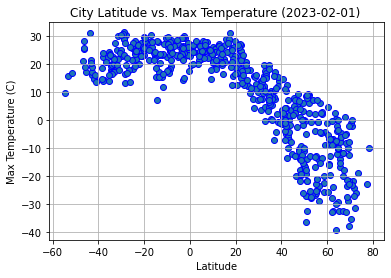

In [12]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="blue")
plt.title(f"City Latitude vs. Max Temperature (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

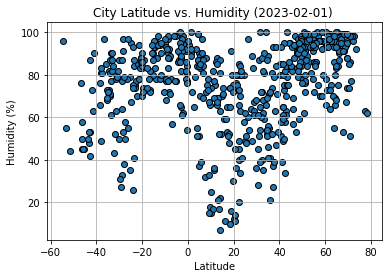

In [13]:
# Build the scatter plots for latitude vs. humidity
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Humidity (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

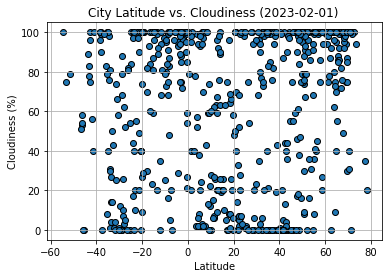

In [15]:
# Build the scatter plots for latitude vs. cloudiness
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

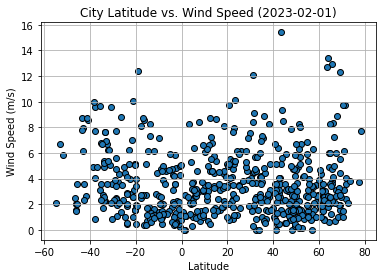

In [16]:
# Build the scatter plots for latitude vs. wind speed
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def regression_plots(x_values,y_values,title, y_label, line_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lasa,46.6166,10.7002,-2.53,94,59,3.03,IT,1675296496
1,nishihara,26.1842,127.7558,17.81,97,75,6.17,JP,1675296628
3,qaanaaq,77.4840,-69.3632,-23.02,63,35,3.75,GL,1675296475
5,victoria,22.2855,114.1577,20.69,85,5,0.89,HK,1675296518
6,khatanga,71.9667,102.5000,-31.63,96,100,2.44,RU,1675296636


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mar del plata,-38.0023,-57.5575,22.27,81,100,4.02,AR,1675296510
4,ngunguru,-35.6167,174.5000,22.25,85,83,3.13,NZ,1675296493
8,hermanus,-34.4187,19.2345,17.67,82,76,2.71,ZA,1675296638
9,sicuani,-14.2694,-71.2261,6.88,93,100,1.78,PE,1675296638
12,esperance,-33.8667,121.9000,17.39,70,81,5.37,AU,1675296029


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8585127239099912


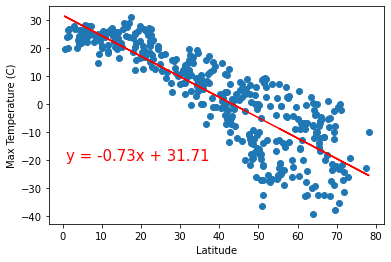

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regression_plots(x_values,y_values,"Northern Hemisphere: Temperature vs. Latitude Linear Regression", 
                 "Max Temperature (C)", (1,-20))

The r-value is: 0.3150602997217695


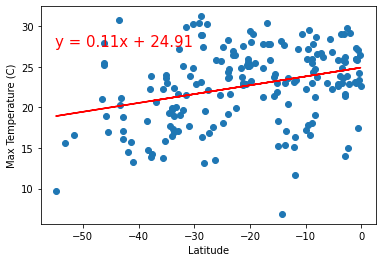

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regression_plots(x_values,y_values,"Southern Hemisphere: Temperature vs. Latitude Linear Regression", 
                 "Max Temperature (C)", (-55, 27.5))

**Discussion about the linear relationship:** There is a strong correlation between temp. and location in refrence to the equator in the northern hemisphere. The correlation is much weaker in the southern hemisphere but still there. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4450172721100113


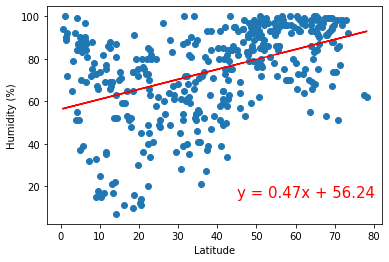

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regression_plots(x_values,y_values,"Northern Hemisphere: Humidity vs. Latitude Linear Regression", 
                 "Humidity (%)", (45,15))

The r-value is: 0.45736536606443057


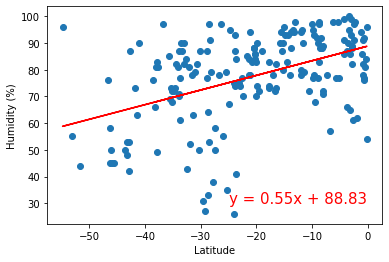

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regression_plots(x_values,y_values,"Southern Hemisphere: Humidity vs. Latitude Linear Regression", 
                 "Humidity (%)", (-25, 30))

**Discussion about the linear relationship:** There appears to be a weak correlation between humidity and the distance from the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.34503340136702154


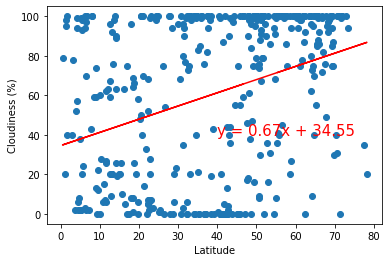

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regression_plots(x_values,y_values,"Northern Hemisphere: Cloudiness vs. Latitude Linear Regression", 
                 "Cloudiness (%)", (40,40))

The r-value is: 0.28002639276026137


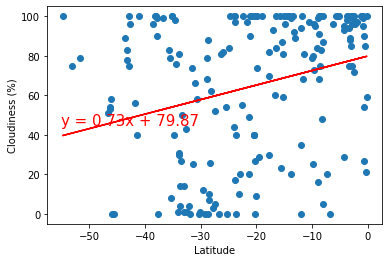

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regression_plots(x_values,y_values,"Southern Hemisphere: Cloudiness vs. Latitude Linear Regression", 
                 "Cloudiness (%)", (-55, 45))

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01980929951250852


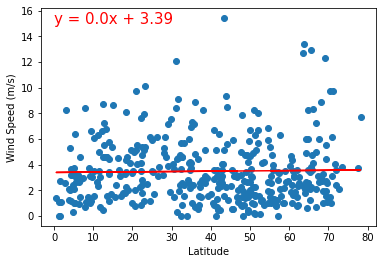

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regression_plots(x_values,y_values,"Northern Hemisphere: Wind Speed vs. Latitude Linear Regression", 
                 "Wind Speed (m/s)", (0,15))

The r-value is: -0.3533453210209871


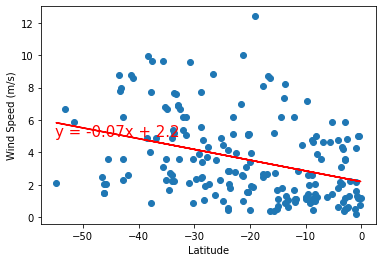

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regression_plots(x_values,y_values,"Southern Hemisphere: Wind Speed vs. Latitude Linear Regression", 
                 "Wind Speed (m/s)", (-55, 5))

**Discussion about the linear relationship:** There is no correlation between windspeed and distnce from the equator.